In [38]:
import pandas as pd

In [40]:
dataFrame=pd.read_excel('bisiklet_fiyatlari.xlsx')

In [42]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [44]:
import seaborn as sbn
import matplotlib.pyplot as plt

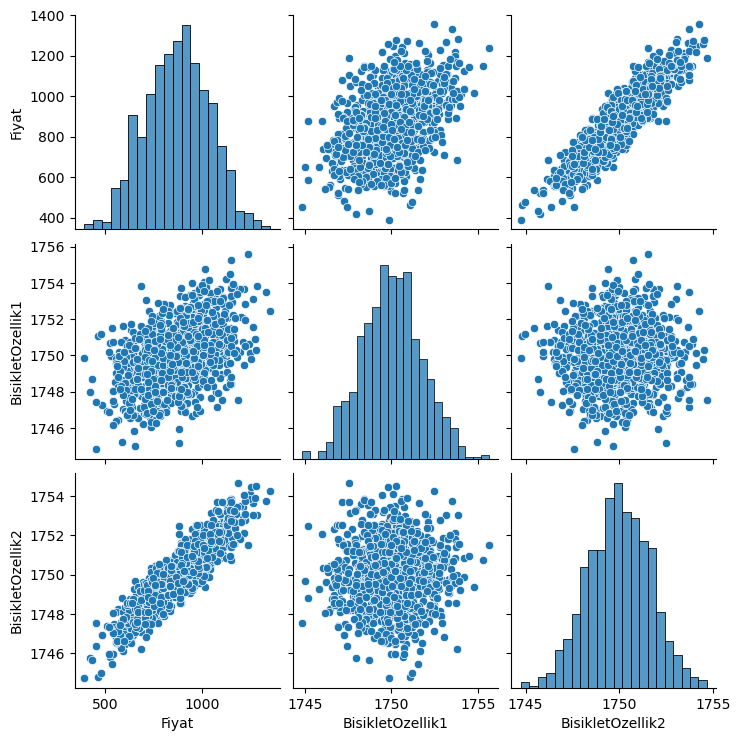

In [46]:
sbn.pairplot(dataFrame)

## veriyi test/train olarak ikiye ayırmak

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
#train_test_split

In [50]:
dataFrame

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [79]:
# y = wx + b
#y -> label
y=dataFrame["Fiyat"].values

# x -> feature(özellik)
x=dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [81]:
x_train.shape

(670, 2)

In [83]:
x_test.shape

(330, 2)

In [85]:
y_train.shape

(670,)

In [87]:
y_test.shape

(330,)

In [89]:
#scaling

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
scaler=MinMaxScaler()

In [95]:
scaler.fit(x_train)

MinMaxScaler()

In [102]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [104]:
x_train

array([[-164.40582975, -180.35279201],
       [-164.3773597 , -180.32669398],
       [-164.38493744, -180.40918084],
       ...,
       [-164.41361136, -180.36488552],
       [-164.36437795, -180.39950893],
       [-164.39532211, -180.40222517]])

In [109]:
import tensorflow as tf

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [115]:
model=Sequential()

model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop",loss="mse")

In [119]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 811940.1250
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 828809.2500
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 801256.0625
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 813716.2500
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 794949.4375
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 792244.6875
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 778392.6875
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 798784.3750
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 796529.5000
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 805927.9375
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 783302.7500
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 798329.4375
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 787276.8125
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 793350.3125

In [125]:
loss=model.history.history["loss"]

<Axes: >

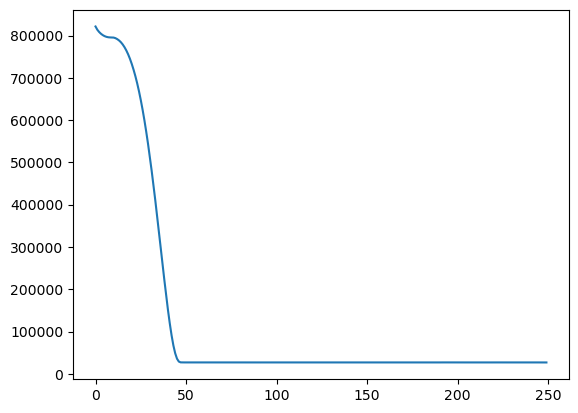

In [127]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [131]:
trainLoss=model.evaluate(x_train,y_train)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25384.9199


In [133]:
testLoss=model.evaluate(x_test,y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28254.9492 


In [135]:
trainLoss

26898.41796875

In [137]:
testLoss

27542.017578125

In [139]:
testTahminleri=model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [141]:
testTahminleri

array([[886.06757],
       [886.22546],
       [886.13495],
       [886.1511 ],
       [886.15295],
       [886.32245],
       [886.1237 ],
       [886.10626],
       [886.0997 ],
       [886.09125],
       [886.1789 ],
       [886.11   ],
       [886.129  ],
       [886.07245],
       [886.0354 ],
       [886.21466],
       [886.0673 ],
       [886.2425 ],
       [886.0605 ],
       [886.1323 ],
       [886.13477],
       [886.18146],
       [886.2703 ],
       [886.255  ],
       [886.14514],
       [886.0548 ],
       [886.20337],
       [886.189  ],
       [886.15216],
       [886.1828 ],
       [886.3014 ],
       [886.1642 ],
       [886.19525],
       [886.23157],
       [886.1409 ],
       [886.15485],
       [886.0791 ],
       [886.1015 ],
       [886.14545],
       [886.152  ],
       [886.1798 ],
       [886.04486],
       [886.06104],
       [886.0615 ],
       [886.12164],
       [886.2382 ],
       [886.06647],
       [886.1183 ],
       [886.09125],
       [886.13855],


In [143]:
tahminDf=pd.DataFrame(y_test,columns=["Gerçek Y"])

In [145]:
tahminDf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [149]:
testTahminleri=pd.Series(testTahminleri.reshape(330,))

In [151]:
testTahminleri

0      886.067566
1      886.225464
2      886.134949
3      886.151123
4      886.152954
          ...    
325    886.086182
326    886.183044
327    886.171326
328    886.029785
329    886.185730
Length: 330, dtype: float32

In [153]:
tahminDf=pd.concat([tahminDf,testTahminleri],axis=1)

In [155]:
tahminDf

,Gerçek Y,0
0,1081.652164,886.067566
1,622.675990,886.225464
2,889.356810,886.134949
3,902.826733,886.151123
4,897.662404,886.152954
...,...,...
325,1028.438035,886.086182
326,789.934950,886.183044
327,758.490486,886.171326
328,1172.871659,886.029785


In [157]:
tahminDf.columns = ["Gerçek Y", "Tahmin Y"]

In [159]:
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,886.067566
1,622.675990,886.225464
2,889.356810,886.134949
3,902.826733,886.151123
4,897.662404,886.152954
...,...,...
325,1028.438035,886.086182
326,789.934950,886.183044
327,758.490486,886.171326
328,1172.871659,886.029785


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

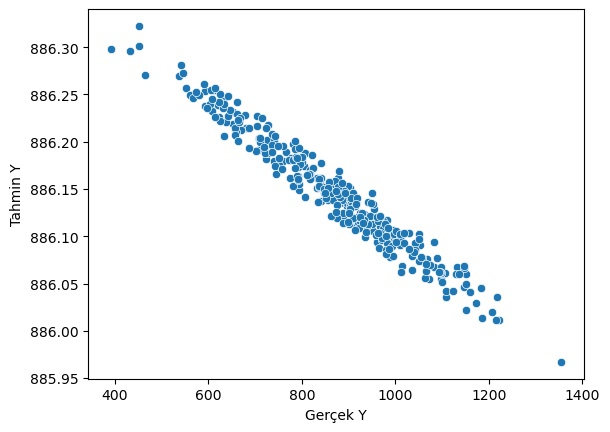

In [161]:
sbn.scatterplot(x = "Gerçek Y", y = "Tahmin Y", data = tahminDf)

In [163]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [165]:
mean_absolute_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

131.73548294788824

In [167]:
mean_squared_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

27542.019315558504

In [169]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [171]:
yeniBisikletOzellikleri = [[1751,1750]]

In [173]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [175]:
model.predict(yeniBisikletOzellikleri)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[2.646654]], dtype=float32)

In [183]:
from tensorflow.keras.models import load_model

In [185]:
model.save("bisiklet_modeli.h5")

In [187]:
sonradanCagirilanModel.predict(yeniBisikletOzellikleri)

NameError: name 'sonradanCagirilanModel' is not defined